In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re
import string
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/My Drive/research/Data/

/content/drive/My Drive/research/Data


In [ ]:
df = pd.read_csv('sinhala_df_new.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12573 entries, 0 to 12572
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   comment_id    12567 non-null  object
 1   video_id      12307 non-null  object
 2   video_title   12307 non-null  object
 3   text          12573 non-null  object
 4   timestamp     12556 non-null  object
 5   author        12553 non-null  object
 6   author_email  12556 non-null  object
 7   reply_to      261 non-null    object
 8   Label         5387 non-null   object
 9   Domain        5621 non-null   object
 10  About         3582 non-null   object
dtypes: object(11)
memory usage: 1.1+ MB


In [ ]:
df.Domain.value_counts()

,count
Domain,
political,3631
non,1990


In [ ]:
df = df[df[['Label', 'Domain', 'About']].apply(lambda row: row.notna().any(), axis=1)]


In [ ]:
df.shape

(6500, 11)

In [ ]:
df['Domain'] = df['Domain'].replace(['P', 'p','Political','Politician','political','Government','rajapaksha',' P'], 'political')
df['Domain'] = df['Domain'].replace(['non','Non','Non ','non ','Non-Political',' non'],'non')

In [ ]:
df.About.value_counts()

,count
About,
Ranil,552
Prasanna,428
NPP,402
Maithree,234
Other,163
...,...
Rajapakshat,1
sports minister,1
Premadasa,1


In [ ]:
#df = df.head(1000)
df.shape

(6500, 11)

In [ ]:
political_df = df[df['Domain'] == 'political']
non_political_df = df[df['Domain'] == 'non']

# Sample 300 entries from each category
sampled_political = political_df.sample(n=1990, random_state=42)
sampled_non_political = non_political_df.sample(n=1990, random_state=42)

# Combine the sampled entries into a single DataFrame
df = pd.concat([sampled_political, sampled_non_political])


In [ ]:
df.shape

(3980, 11)

# Combine Title and Text columns

In [ ]:
df['Combined'] = df['video_title'] + '.' + df['text']

# Remove Emoticons

In [ ]:
def remove_emoji(string):
    if isinstance(string, str): # Check if the input is a string
        emoji_pattern = re.compile("["
                               u"\U0001F600-\U0001F64F"  # emoticons
                               u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                               u"\U0001F680-\U0001F6FF"  # transport & map symbols
                               u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                               u"\U00002702-\U000027B0"
                               u"\U000024C2-\U0001F251"
                               "]+", flags=re.UNICODE)
        return emoji_pattern.sub(r'', string)
    else:
        return string # Return the original value if it's not a string

df['Combined'] = df['Combined'].apply(remove_emoji)

# Remove URLs

In [ ]:
import re

def remove_urls(text):
  if isinstance(text, str): # Check if the input is a string
    return re.sub(r'''(?i)\b((?:https?://|www\d{0,3}[.]|[a-z0-9.\-]+[.][a-z]{2,4}/)(?:[^\s()<>]+|\(([^\s()<>]+|(\([^\s()<>]+\)))*\))+(?:\(([^\s()<>]+|(\([^\s()<>]+\)))*\)|[^\s`!()\[\]{};:'".,<>?«»“”‘’]))''', " ", text)
  else:
    return text # Return the original value if it's not a string

# Apply the function to the text column
df['Combined'] = df['Combined'].apply(remove_urls)

# Data Cleaning

In [ ]:
import re

def clean_data(text):
    if isinstance(text, str): # Check if the input is a string
        text = re.sub(r'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\\(\\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+', '', text) # Remove URLs

        text = re.sub(r'<.*?>', '', text)     # Remove HTML tags

        text = re.sub(r'@\\w+', '', text)  # Remove mentions

        text = re.sub(r'[^\u0D80-\u0DFF\s]', ' ', text) # Remove non-Sinhala characters (punctuation, numbers, etc.)
        return text
    else:
        return text # Return the original value if it's not a string

df['Combined'] = df['Combined'].apply(clean_data)

In [ ]:
df.iloc[50:75]

,comment_id,video_id,video_title,text,timestamp,author,author_email,reply_to,Label,Domain,About,Combined
5985,UgzgnS4ki_Pxu-sKv7R4AaABAg,DfprD8Q3ML0,රාජ්‍ය අමාත්‍ය සනත් නිශාන්ත අවසන් වරට සහභාගී ව...,සක්කිලි දේශපාලනයේ තවත් නියෝජනයක්‌ පමණි. මාද්‍ය...,2024-01-25T17:44:51Z,@piumikawijewantha1328,UCMCtAC2OOTy9GZCihq-FN2g,NaN,Negative,political,all,රාජ් ය අමාත් ය සනත් නිශාන්ත අවසන් වරට සහභාගී ව...
972,Ugw3YEoDt_m-iWUad394AaABAg,PCTYPWpdhu0,අගමැතිගෙන් විශේෂ ප්‍රකාශයක්...,දිට්ට ධම්ම වේදනීය කම්ම යාපනේ පොදු පුස්තකාලේ පු...,2022-07-11T16:14:43Z,@chamalkanchana,UC-O-ewVr21Wy5c5g68hXhPg,NaN,Negative,political,Ranil,අගමැතිගෙන් විශේෂ ප් රකාශයක් දිට්ට ධම්ම වේදන...
12506,UgzfztSqTEz1-wytAMZ4AaABAg,ATp1roZvhDk,පාලකයින් කකා බිබී නටන අතර රටවැසි බහුතරයකගේ කුස...,මෙ වගෙ කලකාණණියෙ නැවත් පර්ලෙමෙන්තූ නොයන්න වැඩ ...,2023-08-14T11:02:11Z,@malikanda1755,UCQpwjo48XorZY2vQ0yjUazw,NaN,Negative,political,Mahinda,පාලකයින් කකා බිබී නටන අතර රටවැසි බහුතරයකගේ කුස...
73,UgxIpzxV0V5i10_BDEx4AaABAg,pKirEdEuG5k,"ජනපතිට හිමිවන මැතිවරණ සහාය ""රනිල් මහත්තයාට දෙන...",තොපි මැරෙන දවසට තමයි අපි අපේ රටේ නිදහස සමරන්නෙ 😐,2024-01-09T08:46:30Z,@redfoxdjcrash9068,UCF9tkpOv99CYSphK_NYwX1w,NaN,Negative,political,Ranil,ජනපතිට හිමිවන මැතිවරණ සහාය රනිල් මහත්තයාට දෙන...
12536,UgxnCis7ES-npn4TGAV4AaABAg,DYVRK4MCO3g,Deepthi Samaga Paththaren Eha Discussion - (2...,"අංක 01.<br>එක්සත් ජාතක පක්ෂය අවංක නම්,<br><br...",2024-03-18T09:48:53Z,@rohanaalvitigala865,UCkB0UOurdD96gOGnBCMrzXA,NaN,Negative,political,Everyone,...
5094,UgzDy8Mb7JJ-oKI0Hah4AaABAg,2oMeCFVGpWI,ප්‍රසන්න පොහොට්ටුව හැර යයිද ? | Hiru News | Hi...,රෙදි ගලවලා කතාකරානමිි හොදයි.,2024-03-03T01:01:11Z,@user-ey3zp9kk8j,UCDcdPRLSBBils6F8RFPRZNg,NaN,Negative,political,Prasanna,ප් රසන්න පොහොට්ටුව හැර යයිද ...
5659,UgxwHRNYp9vRqeOjwVd4AaABAg,2oMeCFVGpWI,ප්‍රසන්න පොහොට්ටුව හැර යයිද ? | Hiru News | Hi...,මාලිමාවට ජයෙන් ජය ලැබිය යුතුමයි.!,2024-03-02T12:21:59Z,@sugathekanayake7822,UCLa0NC8Ss_gD9ssYjRCqBDg,NaN,Positive,political,NPP,ප් රසන්න පොහොට්ටුව හැර යයිද ...
11522,UgygHpmrJwxewVU9yUd4AaABAg,1XFoZ_qc9Cs,"පාර්ලිමේන්තු කැන්ටිමේ කිරි නෑ - කිරි ඉල්ලා, මන...",ගොං කිරි නැතිව ගොං හරක් ගව ගාල්ලේ යකා නටලා,2022-03-09T03:01:32Z,@user-sl7og2ln7f,UCLkuQKU7WDStLYRz3OI5qJQ,NaN,Negative,political,everyone,පාර්ලිමේන්තු කැන්ටිමේ කිරි නෑ කිරි ඉල්ලා මන...
8009,UgymcyQQw6MVAB5gTZt4AaABAg,vf-mZcxvdjM,නඩු තීන්දුව ගැන අහන්න එපා - කතෝලික සභාවෙන් සමා...,මුලින්ම දැක්කේ පභයෙක් වගේ,2023-02-10T21:50:56Z,@worldintoyou,UCuBvhucEtWDGsd8-xiDKqLw,NaN,negative,political,Maithree,නඩු තීන්දුව ගැන අහන්න එපා කතෝලික සභාවෙන් සමා...
800,UgzjAGsfFtY3fPGQlxh4AaABAg,4EKC4Qr7fac,අභිමානවත් සැමරුම මැද.. කාගේත් හදවත් සංවේදී කළ ...,රනිල් පටිට,2023-05-19T14:56:01Z,@lalitjayasingha805,UCuFMF-2Xa-TtEBAYRY74Nsw,NaN,Positive,political,Ranil,අභිමානවත් සැමරුම මැද කාගේත් හදවත් සංවේදී කළ ...


In [ ]:
columns = ['Combined','Label','Domain','About']

df = df[columns]

In [ ]:
df.iloc[12:20]

,Combined,Label,Domain,About
8361,බෞද්ධ සරසවිය සම්පූර්ණයෙන්ම වසා දමයිද ...,negative,political,government
10016,හිරු සවස ප් රධාන ප් රවෘත්ති ප් රකාශය ...,Negative,political,Sajith
5721,ප් රසන්න පොහොට්ටුව හැර යයිද ...,Negative,political,Prasanna
3859,අමෙරිකාව චීනය අතර විරසකය දුරුවෙය...,negative,political,everyone
5296,ප් රසන්න පොහොට්ටුව හැර යයිද ...,Negative,political,Prasanna
11463,තවත් පුළුවන් තරම් සහන දෙනවා බැසිල් ඖෂධ මිල...,Negative,political,Basil
5911,ජනාධිපතිවරණය කල් යයිද ...,Negative,political,Government
11787,සංඝ රත්නයෙන් අවසර නොගෙන හලීම් කළ කතාව ඇයි මේ ර...,Negative,political,Ranil


In [ ]:
df.Domain.value_counts()

,count
Domain,
political,1990
non,1990


In [ ]:
df = df.sample(frac=1.0, random_state=42)

In [ ]:
labels = df['Domain'].unique().tolist()
labels = [str(s).strip() for s in labels ]
labels
labels[0], labels[1] = labels[1], labels[0]
labels

['non', 'political']

In [ ]:

NUM_LABELS= len(labels)

id2label={id:label for id,label in enumerate(labels)}

label2id={label:id for id,label in enumerate(labels)}

In [ ]:
df.head()

,Combined,Label,Domain,About
8178,නඩු තීන්දුව ගැන අහන්න එපා කතෝලික සභාවෙන් සමා...,negative,political,Maithree
10022,හිරු සවස ප් රධාන ප් රවෘත්ති ප් රකාශය ...,NaN,non,NaN
8885,හිරු රාත් රී ප් රධාන ප් රවෘත්ති ප් රකාශය ...,negative,political,Sajith
11447,ඩොලරය අහසට රුපියල බල්ලට ජනතාව වළපල්ලට ...,NaN,non,NaN
3891,පරාජයේ වගකීම භාරගන්නේ කවුද ක් ර...,negative,non,NaN


In [ ]:
label2id

{'non': 0, 'political': 1}

In [ ]:
df.Domain.value_counts()

,count
Domain,
political,1990
non,1990


In [ ]:
id2label

{0: 'non', 1: 'political'}

In [ ]:
for key, value in enumerate(labels):
    print(value)

non
political


In [ ]:
df["Domain"]=df.Domain.map(lambda x: label2id[x.strip()])

<Axes: ylabel='count'>

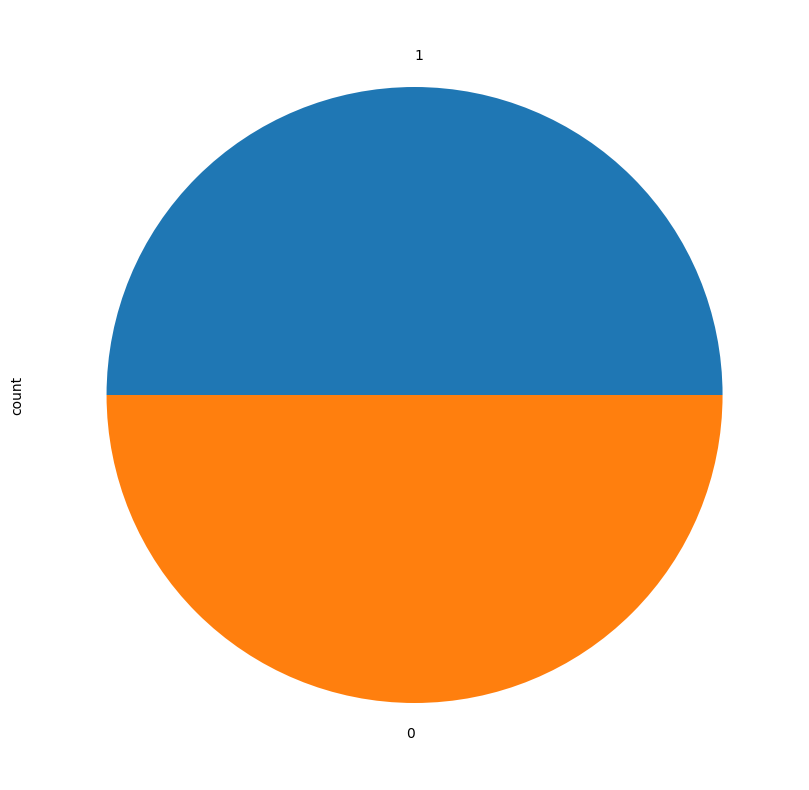

In [ ]:
df.Domain.value_counts().plot(kind='pie', figsize=(10,10))

In [ ]:
df.head()

,Combined,Label,Domain,About
8178,නඩු තීන්දුව ගැන අහන්න එපා කතෝලික සභාවෙන් සමා...,negative,1,Maithree
10022,හිරු සවස ප් රධාන ප් රවෘත්ති ප් රකාශය ...,NaN,0,NaN
8885,හිරු රාත් රී ප් රධාන ප් රවෘත්ති ප් රකාශය ...,negative,1,Sajith
11447,ඩොලරය අහසට රුපියල බල්ලට ජනතාව වළපල්ලට ...,NaN,0,NaN
3891,පරාජයේ වගකීම භාරගන්නේ කවුද ක් ර...,negative,0,NaN


In [ ]:

data_texts = df['Combined'].to_list()

data_labels = df['Domain'].to_list()

In [ ]:
label_set = set(data_labels)

In [ ]:
label_set

{0, 1}

In [ ]:
df.head()

,Combined,Label,Domain,About
8178,නඩු තීන්දුව ගැන අහන්න එපා කතෝලික සභාවෙන් සමා...,negative,1,Maithree
10022,හිරු සවස ප් රධාන ප් රවෘත්ති ප් රකාශය ...,NaN,0,NaN
8885,හිරු රාත් රී ප් රධාන ප් රවෘත්ති ප් රකාශය ...,negative,1,Sajith
11447,ඩොලරය අහසට රුපියල බල්ලට ජනතාව වළපල්ලට ...,NaN,0,NaN
3891,පරාජයේ වගකීම භාරගන්නේ කවුද ක් ර...,negative,0,NaN


In [ ]:
import numpy as np
contents = [content for content in df.Combined]

max_content_len = 0

content_len = []
for content in contents:
    # Check if content is a string before splitting
    if isinstance(content, str):
        content_len.append(len(content.split()))
        max_content_len = max(len(content.split()), max_content_len)
    else:
        # Handle non-string values (e.g., convert to string or skip)
        print(f"Skipping non-string value: {content}")

print('Number of contents:', len(contents))
print('Max length of the contents:', max_content_len)
print('Mean length of the contents:', np.mean(content_len))

Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping non-string value: nan
Skipping

# Model and Training

In [ ]:
# from transformers import AutoModelForSequenceClassification
# model = AutoModelForSequenceClassification.from_pretrained('AshenR/AshenBERTo', num_labels=NUM_LABELS)  #  binary classi

In [ ]:
from transformers import AutoModelForSequenceClassification, RobertaConfig

# Load the existing configuration
config = RobertaConfig.from_pretrained('AshenR/AshenBERTo')

# Modify the dropout rates
config.attention_probs_dropout_prob = 0.1  # Example: Set attention dropout to 30%
config.hidden_dropout_prob = 0.1  # Example: Set hidden layer dropout to 30%

# Set the number of labels in the config
config.num_labels = NUM_LABELS  # Set the number of labels here

# Load the model with the modified configuration
model = AutoModelForSequenceClassification.from_pretrained('AshenR/AshenBERTo', config=config)


/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/636 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/236M [00:00<?, ?B/s]

Some weights of RobertaForSequenceClassification were not initialized from the model checkpoint at AshenR/AshenBERTo and are newly initialized: ['classifier.dense.bias', 'classifier.dense.weight', 'classifier.out_proj.bias', 'classifier.out_proj.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
model.config

RobertaConfig {
  "_name_or_path": "AshenR/AshenBERTo",
  "architectures": [
    "RobertaForMaskedLM"
  ],
  "attention_probs_dropout_prob": 0.1,
  "bos_token_id": 0,
  "classifier_dropout": null,
  "eos_token_id": 2,
  "hidden_act": "gelu",
  "hidden_dropout_prob": 0.1,
  "hidden_size": 768,
  "initializer_range": 0.02,
  "intermediate_size": 3072,
  "layer_norm_eps": 1e-12,
  "max_position_embeddings": 514,
  "model_type": "roberta",
  "num_attention_heads": 12,
  "num_hidden_layers": 6,
  "pad_token_id": 1,
  "position_embedding_type": "absolute",
  "torch_dtype": "float32",
  "transformers_version": "4.44.2",
  "type_vocab_size": 1,
  "use_cache": true,
  "vocab_size": 20000
}

# Train, Test, Validation Split

In [ ]:
from sklearn.model_selection import train_test_split
train_df, temp_df = train_test_split(df, test_size=0.2, random_state=42)
val_df, test_df = train_test_split(temp_df, test_size=0.5, random_state=42)

In [ ]:
from transformers import AutoTokenizer, AutoModelForMaskedLM
tokenizer = AutoTokenizer.from_pretrained("AshenR/AshenBERTo",force_download = True)

# train_encodings = tokenizer(train_texts,max_length = 512, truncation = True, padding = "max_length"  )

# val_encodings = tokenizer(val_texts, max_length = 512,truncation = True, padding = "max_length" )

# test_encodings = tokenizer(test_texts, max_length = 512,truncation = True, padding = "max_length" )


tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/437k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/307k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.08M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/958 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/1.23k [00:00<?, ?B/s]

In [ ]:
import torch
from torch.utils.data import TensorDataset, DataLoader, RandomSampler, SequentialSampler
from tqdm import tqdm
from sklearn.metrics import accuracy_score
from torch.utils.data import Dataset

In [ ]:
class FakeNewsDataset(Dataset):
    def __init__(self, data, tokenizer, max_length=208):
        self.data = data
        self.tokenizer = tokenizer
        self.max_length = max_length

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        text = self.data.iloc[idx]['Combined']
        label = torch.tensor(self.data.iloc[idx]['Domain'], dtype=torch.long)

        encoding = self.tokenizer.encode_plus(
            text,
            add_special_tokens=True,
            truncation=True,
            max_length=self.max_length,
            padding='max_length',
            return_tensors='pt'
        )

        input_ids = encoding['input_ids'].squeeze()
        attention_mask = encoding['attention_mask'].squeeze()

        return {'input_ids': input_ids, 'attention_mask': attention_mask, 'label': label}


# model to GPU if available
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
model = model.to(device)

# Create datasets and data loaders
train_dataset = FakeNewsDataset(train_df, tokenizer)
val_dataset = FakeNewsDataset(val_df, tokenizer)
test_dataset = FakeNewsDataset(test_df, tokenizer)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=32, shuffle=False)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

# Set up optimizer and loss function
optimizer = torch.optim.Adam(model.parameters(), lr=5e-6)
criterion = torch.nn.CrossEntropyLoss()

# Training loop
NUM_EPOCHS = 20
train_losses = []
val_losses = []
val_accuracies = []
train_accuracies = []
test_accuracies = []

for epoch in range(NUM_EPOCHS):
    # Training
    model.train()
    train_loss = 0.0
    all_preds = []
    all_labels = []

    loop = tqdm(train_loader)
    for batch in loop:
        input_ids = batch['input_ids'].to(device)
        attention_mask = batch['attention_mask'].to(device)
        labels = batch['label'].to(device)

        optimizer.zero_grad()
        outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
        loss = outputs.loss
        loss.backward()
        optimizer.step()

        _, preds = torch.max(outputs.logits, 1)

        all_preds.extend(preds.cpu().tolist())
        all_labels.extend(labels.cpu().tolist())

        train_loss += loss.item()

        loop.set_description(f"Epoch [{epoch+1}/{NUM_EPOCHS}]")
        loop.set_postfix(loss=train_loss / len(loop), acc=accuracy_score(all_preds, all_labels))

    # Validation
    model.eval()
    val_loss = 0.0
    val_preds = []
    val_labels = []

    with torch.no_grad():
        for batch in tqdm(val_loader):
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss
            _, preds = torch.max(outputs.logits, 1)

            val_preds.extend(preds.cpu().tolist())
            val_labels.extend(labels.cpu().tolist())

            val_loss += loss.item()

# training
    model.eval()
    test_loss = 0.0
    all_test_preds = []
    all_test_labels = []

    with torch.no_grad():
        for batch in test_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = model(input_ids, attention_mask=attention_mask, labels=labels)
            loss = outputs.loss

            _, test_preds = torch.max(outputs.logits, 1)

            all_test_preds.extend(test_preds.tolist())
            all_test_labels.extend(labels.tolist())

            test_loss += loss.item()

    test_accuracy = accuracy_score(all_test_labels, all_test_preds)
    test_accuracies.append(test_accuracy)

    train_acc = accuracy_score(all_preds, all_labels)
    val_acc = accuracy_score(val_preds, val_labels)

    train_losses.append(train_loss / len(train_loader))
    val_losses.append(val_loss / len(val_loader))
    val_accuracies.append(val_acc)
    train_accuracies.append(train_acc)

    print(f"Epoch [{epoch+1}/{NUM_EPOCHS}] - Training Accuracy: {train_acc:.4f}, Validation Accuracy: {val_acc:.4f}")

Epoch [1/20]:   1%|          | 1/100 [00:01<03:10,  1.92s/it, acc=0.5, loss=0.00716]


TypeError: TextEncodeInput must be Union[TextInputSequence, Tuple[InputSequence, InputSequence]]

In [ ]:
torch.save(model,'model_2.pth')

# Training Accuracy and Validation Accuracy

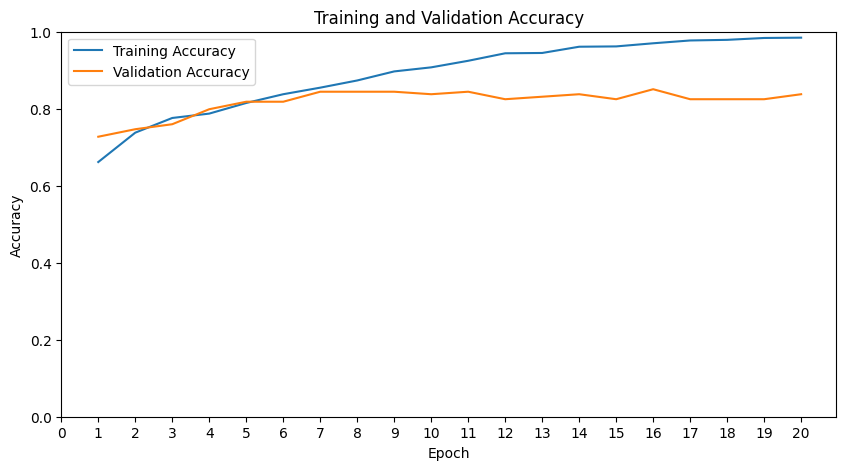

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(range(1, NUM_EPOCHS + 1), train_accuracies, label='Training Accuracy')
plt.plot(range(1, NUM_EPOCHS + 1), val_accuracies, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim(0, 1)
plt.xticks(range(NUM_EPOCHS + 1))
plt.title('Training and Validation Accuracy')
plt.legend()
plt.show()

# Training and Validation Loss

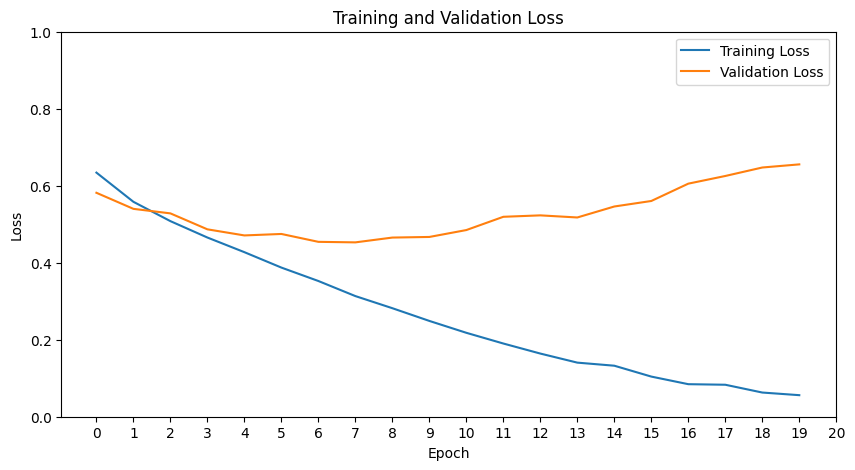

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(train_losses, label='Training Loss')
plt.plot(val_losses, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.xticks(range(NUM_EPOCHS + 1))
plt.title('Training and Validation Loss')
plt.ylim(0,1)
plt.legend()
plt.show()

In [ ]:
from sklearn.metrics import classification_report
class_report = classification_report(all_test_labels, all_test_preds)
class_report = classification_report(all_test_labels, all_test_preds,target_names = ['Political','Non Political'])
print(class_report)

               precision    recall  f1-score   support

    Political       0.81      0.88      0.85        68
Non Political       0.90      0.84      0.87        86

     accuracy                           0.86       154
    macro avg       0.86      0.86      0.86       154
 weighted avg       0.86      0.86      0.86       154



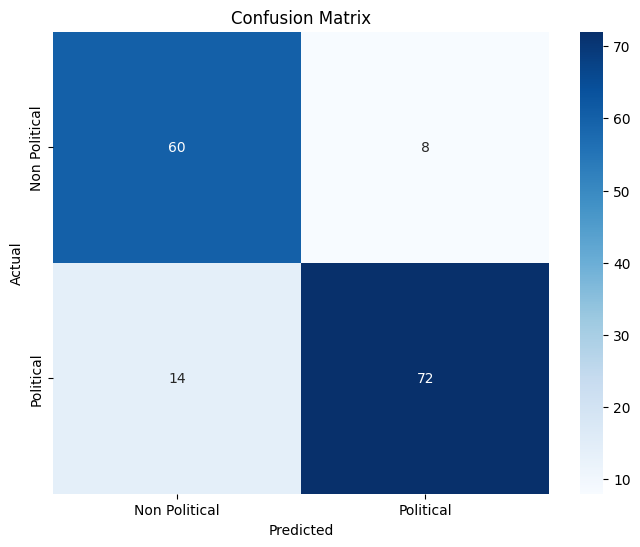

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

conf_matrix = confusion_matrix(all_test_labels, all_test_preds)

plt.figure(figsize=(8, 6))
#sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Non Political','Political'], yticklabels=['Non Political','Political'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Test Accuracy

In [ ]:
model_checkpoint = "model_2.pth"
model = torch.load(model_checkpoint)
model = model.to(device)

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

test_train_accuracies = []

def calculate_accuracy(data_loader, test_model):
    test_model.eval()
    all_preds = []
    all_labels = []

    with torch.no_grad():
        for batch in data_loader:
            input_ids = batch['input_ids'].to(device)
            attention_mask = batch['attention_mask'].to(device)
            labels = batch['label'].to(device)

            outputs = test_model(input_ids, attention_mask=attention_mask)
            _, preds = torch.max(outputs.logits, 1)
            all_preds.extend(preds.tolist())
            all_labels.extend(labels.tolist())

    accuracy = accuracy_score(all_labels, all_preds)
    return accuracy

test_accuracy = calculate_accuracy(test_loader, model)
print(f"Test Accuracy: {test_accuracy:.4f}")


<ipython-input-51-39b047735e5a>:2: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model = torch.load(model_checkpoint)


Test Accuracy: 0.8571


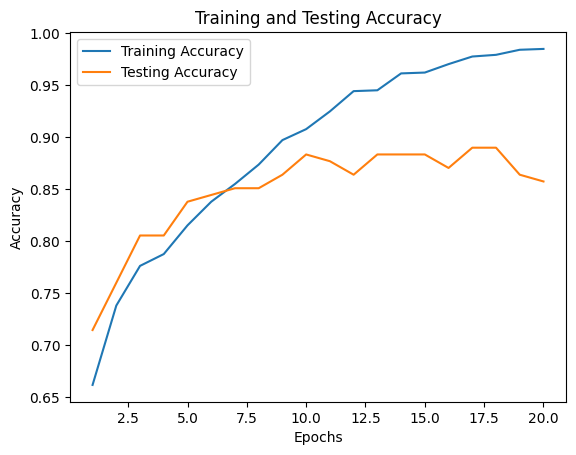

In [ ]:
epochs = range(1, NUM_EPOCHS + 1)
plt.plot(epochs, train_accuracies, label='Training Accuracy')
plt.plot(epochs, test_accuracies, label='Testing Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy')
plt.legend()
plt.show()